<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.** 

# Multiple Linear Regression

### 1. Importing the libraries

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 2. Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')

### 3) Exploratory Data Analysis

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.shape

(50, 5)

In [5]:
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
dataset.duplicated().any()

False

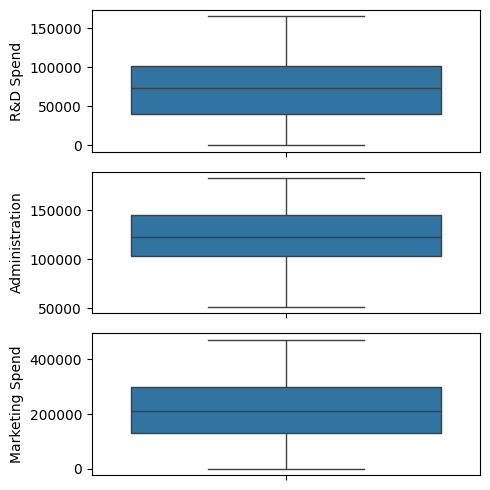

In [7]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['R&D Spend'], ax = axs[0])
plt2 = sns.boxplot(dataset['Administration'], ax = axs[1])
plt3 = sns.boxplot(dataset['Marketing Spend'], ax = axs[2])
plt.tight_layout()

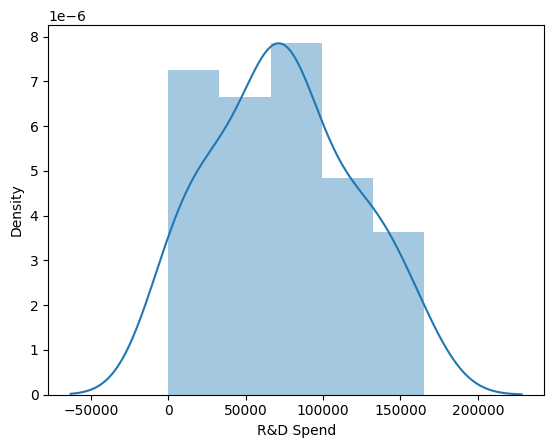

In [8]:
sns.distplot(dataset['R&D Spend']);

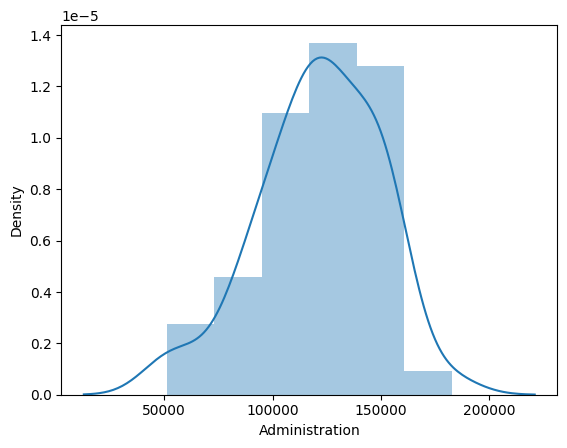

In [9]:
sns.distplot(dataset['Administration']);

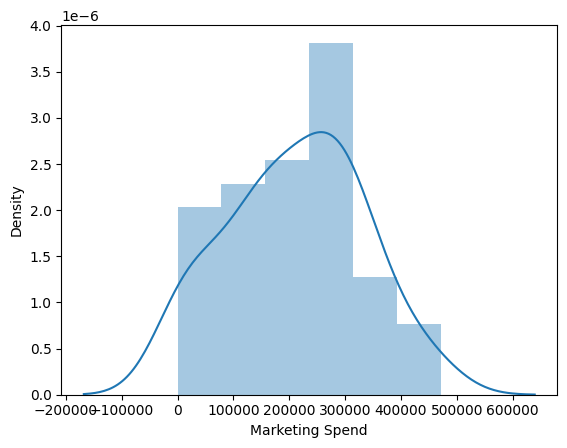

In [10]:
sns.distplot(dataset['Marketing Spend']);

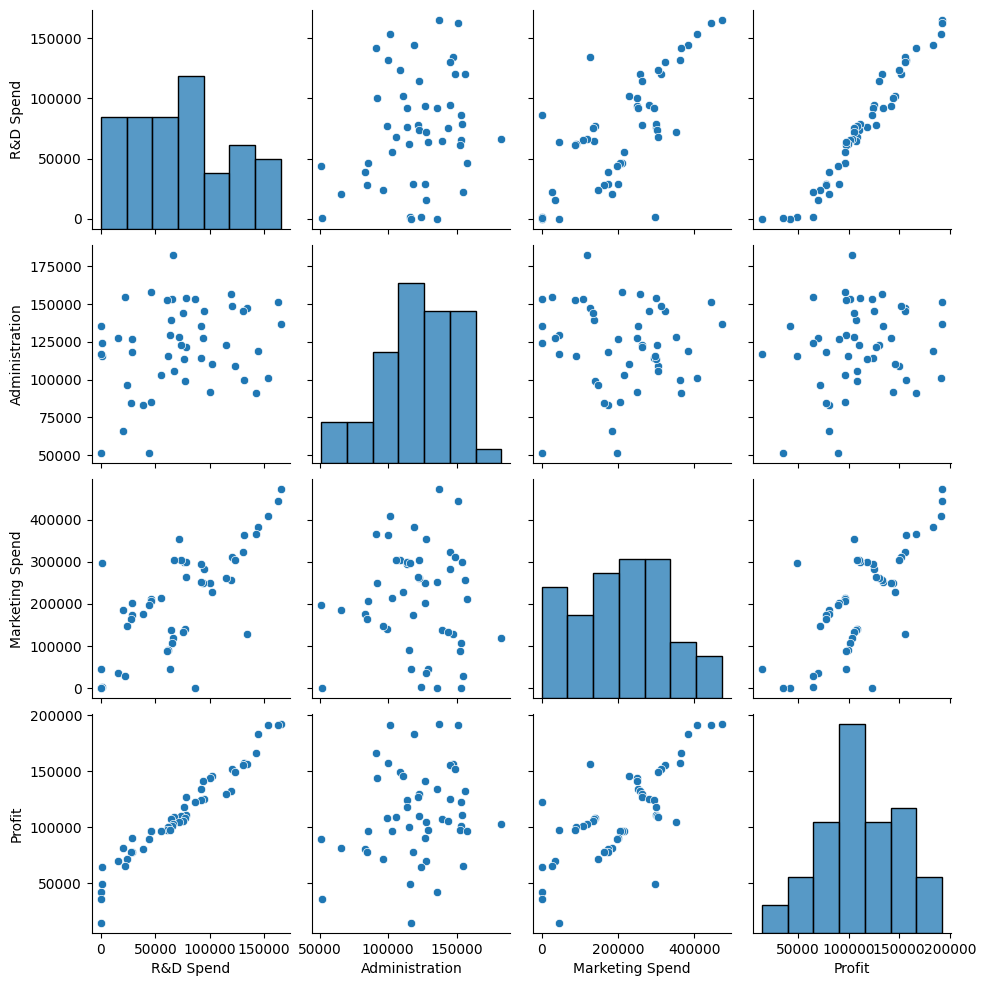

In [11]:
sns.pairplot(dataset)

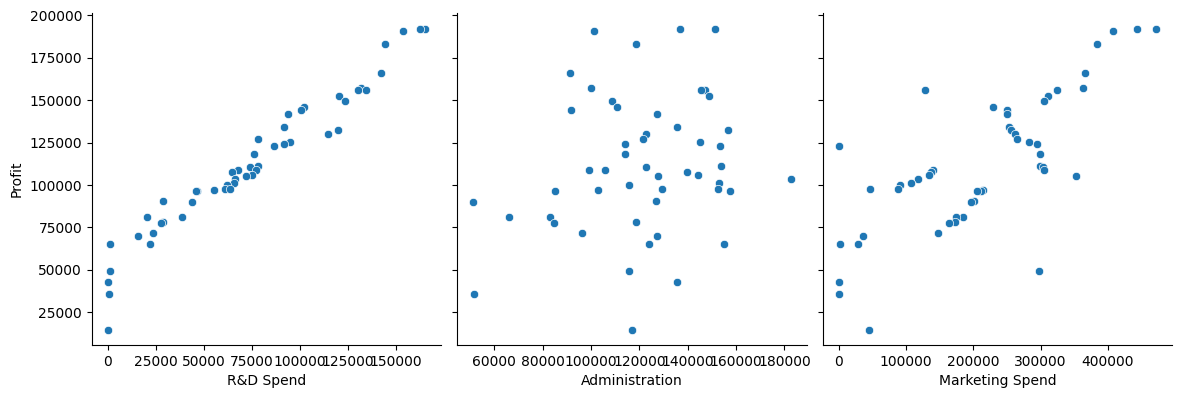

In [12]:
sns.pairplot(dataset, x_vars=["R&D Spend", "Administration", "Marketing Spend"], y_vars='Profit', height=4, aspect=1, kind='scatter')
plt.show()

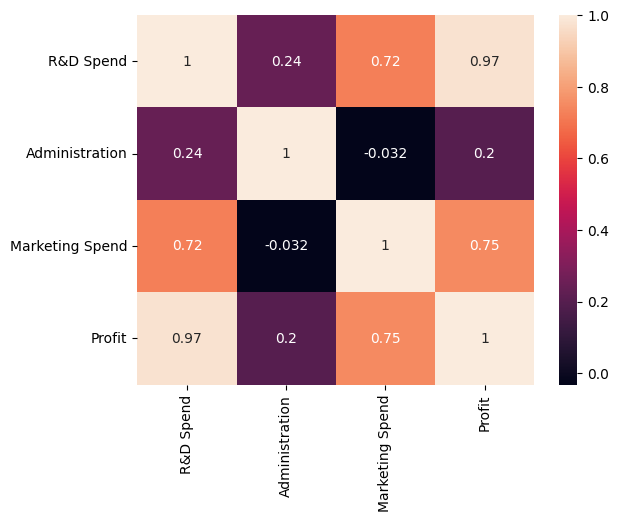

In [14]:
df1 = dataset[["R&D Spend", "Administration", "Marketing Spend", "Profit"]]
sns.heatmap(df1.corr(), annot = True)
plt.show()

### 4. Data Preprocessing 

In [15]:
# Converting Categorical variable to numerical variable
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(dataset[['State']]), columns=encoder.get_feature_names_out(['State']))
df_encoded = pd.concat([dataset, df_encoded], axis=1)
df_encoded.drop(['State'], axis=1, inplace=True)

In [17]:
dataset["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [16]:
df_encoded

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0


### 5. Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Setting the value for X and Y
X = df_encoded.drop(['Profit'], axis=1)
y = df_encoded['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (40, 6)
X_test dimension=  (10, 6)
y_train dimension=  (40,)
y_train dimension=  (10,)


### 6) MLR Model Building with sklearn package

In [20]:
mlr = LinearRegression() 
mlr.fit(X_train, y_train) 

LinearRegression()

In [21]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(X, mlr.coef_))

42467.529248553095


[('R&D Spend', 0.7734671927327998),
 ('Administration', 0.03288459753625585),
 ('Marketing Spend', 0.0366100258638562),
 ('State_California', 86.63836917928265),
 ('State_Florida', -872.6457908778217),
 ('State_New York', 786.0074216985408)]

In [22]:
#Predicting the Test and Train set result 
y_pred_mlr = mlr.predict(X_test)  
x_pred_mlr = mlr.predict(X_train)  

In [23]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
28,103282.38,103015.201598
11,144259.40,132582.277608
10,146121.95,132447.738452
41,77798.83,71976.098513
2,191050.39,178537.482211
27,105008.31,116161.242302
38,81229.06,67851.692097
31,97483.56,98791.733747
22,110352.25,113969.435330
4,166187.94,167921.065696


In [24]:
#Predict for any value

mlr.predict([[134544, 90022, 362443, 1, 0, 0]])

array([162848.92244036])

### Observation

#### Above number is the profit value

### 7) Model Evaluation with Regression metrics 

In [25]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 7514.293659640604
Mean Square Error: 83502864.03257741
Root Mean Square Error: 9137.990152794946


In [26]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(X,y)*100))

R squared value of the model: 94.85
